In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('DB_MidtermSampleData_Mar21.csv')

In [3]:
df

,company,sector,month,job_category,region,gender,count,inflow,outflow
0,SAP SE,Information Technology,2013-10,technician,South America,female,5.071196e+01,4.849139e-01,1.406462e+00
1,Wells Fargo & Company,Financials,2013-10,technician,Pacific Islands,female,1.819455e+00,6.467172e-07,6.981965e-07
2,MICROSOFT CORPORATION,Information Technology,2013-10,scientist,Northern America,male,1.541800e+03,3.127633e+01,2.168564e+01
3,DXC Technology Co,Information Technology,2013-10,sales,Western Europe,female,6.210336e+01,3.428746e+00,4.043797e-03
4,United Technologies Corporation,Industrials,2013-10,administrative,Western Europe,male,7.718991e+01,4.131975e-05,1.567777e-03
5,"Amazon.com, Inc.",Consumer Discretionary,2013-10,administrative,South-Eastern Asia,female,3.429286e+01,1.471297e-05,1.529075e-05
6,IQVIA,Information Technology,2013-10,technician,Eastern Europe,female,1.115343e+01,6.009567e-06,3.177266e-06
7,Coca-Cola Company,Consumer Staples,2013-10,scientist,Pacific Islands,female,1.265747e+01,1.005724e-05,9.539710e-06
8,Walmart Inc,Consumer Staples,2013-10,management,Pacific Islands,male,8.325079e+01,4.726322e-05,2.055409e+00
9,Vodafone Group PLC,Communication,2013-10,sales,Eastern Asia,female,2.747637e+01,2.661863e-05,2.565493e-05


In [4]:
df.shape

(2379034, 9)

In [5]:
df['company'].value_counts()[:30]

PepsiCo, Inc.                                  31392
Intel Corporation                              31392
Coca-Cola Company                              31392
Amazon.com, Inc.                               31392
General Electric Company                       31392
Alphabet Inc.                                  31392
Hewlett Packard Enterprise Company             31392
MICROSOFT CORPORATION                          31392
Walmart Inc                                    31392
International Business Machines Corporation    31392
Verizon Communications Inc.                    31392
Siemens AG                                     31392
Omnicom Group Inc                              31392
Procter & Gamble Co                            31392
Johnson & Johnson                              31392
JPMorgan Chase                                 31392
Facebook Inc                                   31174
AT&T                                           31174
Barclays PLC                                  

In [6]:
df.groupby(['sector', 'company'], as_index=False).count().sort_values('sector').loc[:,['sector','company']]

,sector,company
0,Communication,AT&T
1,Communication,Alphabet Inc.
2,Communication,Comcast Corporation
3,Communication,Facebook Inc
4,Communication,Omnicom Group Inc
5,Communication,Orange SA
6,Communication,Verizon Communications Inc.
7,Communication,Vodafone Group PLC
8,Communication,WPP PLC
9,Communication,Walt Disney Company


In [7]:
df['company'].nunique()

77

In [8]:
df['sector'].nunique()

7

In [9]:
# MICROSOFT CORPORATION
df_ms = df.loc[df['company'] == 'MICROSOFT CORPORATION', :]
print(df_ms.shape)

# International Business Machines Corporation
df_ibm = df.loc[df['company'] == 'International Business Machines Corporation', :]
print(df_ibm.shape)

(31392, 9)
(31392, 9)


# Q How does hiring pattern varies during the year for males and females by region

In [10]:
df_ms.columns

Index(['company', 'sector', 'month', 'job_category', 'region', 'gender',
       'count', 'inflow', 'outflow'],
      dtype='object')

In [11]:
type(df_ms['month'])

pandas.core.series.Series

In [12]:
df_ms['year'] = pd.DatetimeIndex(df_ms['month']).year
df_ms['month_in_year'] = pd.DatetimeIndex(df_ms['month']).month

df_ibm['year'] = pd.DatetimeIndex(df_ibm['month']).year
df_ibm['month_in_year'] = pd.DatetimeIndex(df_ibm['month']).month

In [13]:
df_ms.loc[:,['year']][:5]

,year
2,2013
15,2013
79,2013
121,2013
291,2013


In [14]:
df_ms.loc[:,['month_in_year']][:5]

,month_in_year
2,10
15,10
79,10
121,10
291,10


In [15]:
df_ms.columns

Index(['company', 'sector', 'month', 'job_category', 'region', 'gender',
       'count', 'inflow', 'outflow', 'year', 'month_in_year'],
      dtype='object')

In [16]:
# Females
df_females = df_ms.loc[df_ms['gender'] == 'female', :]
females_in_region= df_females.groupby('region', as_index=False).agg({'count': 'sum'}).sort_values(by='count',ascending=False)
females_in_region['count'].astype(float)
females_in_region[:5]

,region,count
6,Northern America,6.698987e+06
11,Southern Asia,1.377200e+06
3,Eastern Asia,9.773104e+05
7,Northern Europe,9.061995e+05
14,Western Europe,6.125870e+05


In [17]:
# Males
df_females = df_ms.loc[df_ms['gender'] == 'male', :]
males_in_region= df_females.groupby('region', as_index=False).agg({'count': 'sum'}).sort_values(by='count',ascending=False)
males_in_region['count'].astype(float)
males_in_region[:5]

,region,count
6,Northern America,1.284906e+07
11,Southern Asia,2.928643e+06
3,Eastern Asia,1.552407e+06
7,Northern Europe,1.548238e+06
14,Western Europe,1.158671e+06


(0, 15000000)

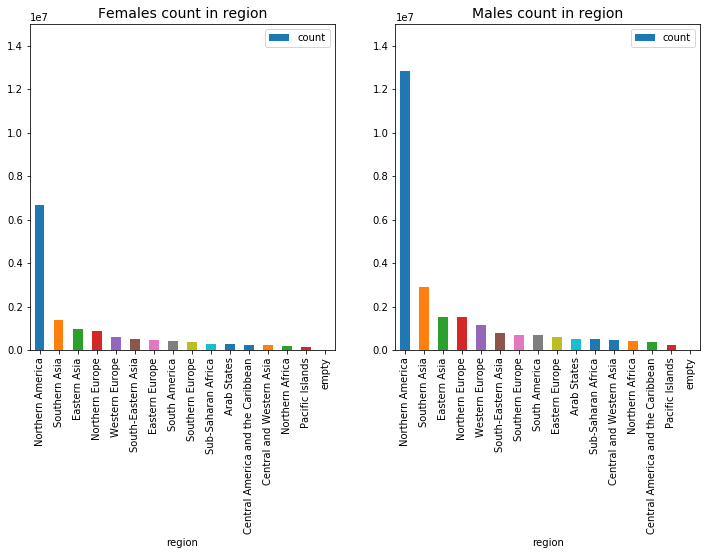

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(12,6))
females_in_region.plot.bar(ax=ax[0], x='region', y = 'count')
ax[0].set_title('Females count in region', size=14)
ax[0].set_ylim(0, 15000000)

males_in_region.plot.bar(ax=ax[1], x='region', y = 'count',)
ax[1].set_title('Males count in region', size=14)
ax[1].set_ylim(0, 15000000)


# Q Change in different hiring sectors over time

In [20]:
df_ms['year'].value_counts()

2015    3456
2014    3456
2013    3456
2012    3456
2020    3456
2019    3456
2018    3456
2017    3456
2016    3456
2021     288
Name: year, dtype: int64

In [21]:
ms_job_category = sorted(df_ms['job_category'].unique())
ibm_job_category = sorted(df_ibm['job_category'].unique())

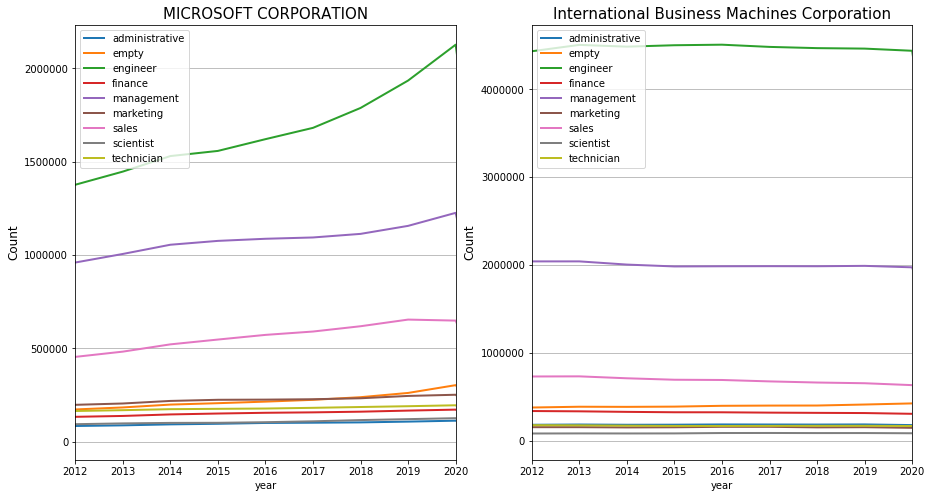

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
for job in ms_job_category:
    df_job = df_ms.loc[df_ms['job_category'] == job, :].groupby('year').agg({'count':'sum'})
    df_job.plot(ax=ax[0], linewidth=2)
ax[0].set_title('MICROSOFT CORPORATION', size=15)
ax[0].set_xlim(2012, 2020)
ax[0].set_ylabel('Count', size=12)
ax[0].legend(ms_job_category, loc="upper left", ncol=1)
ax[0].yaxis.grid(True)

# IBM
for job in ibm_job_category:
    df_job = df_ibm.loc[df_ibm['job_category'] == job, :].groupby('year').agg({'count':'sum'})
    df_job.plot(ax=ax[1], linewidth=2)
ax[1].set_title('International Business Machines Corporation', size=15)
ax[1].set_xlim(2012, 2020)
ax[1].set_ylabel('Count', size=12)
ax[1].legend(ibm_job_category, loc="upper left", ncol=1)
ax[1].yaxis.grid(True)

# Q Does the company increase the hiring of female and male over time

In [31]:
female_ms = df_ms.loc[df_ms['gender'] == 'female'].groupby('year').agg({'count':'sum'})
female_ibm = df_ibm.loc[df_ibm['gender'] == 'female'].groupby('year').agg({'count':'sum'})

In [32]:
male_ms = df_ms.loc[df_ms['gender'] == 'male'].groupby('year').agg({'count':'sum'})
male_ibm = df_ibm.loc[df_ibm['gender'] == 'male'].groupby('year').agg({'count':'sum'})

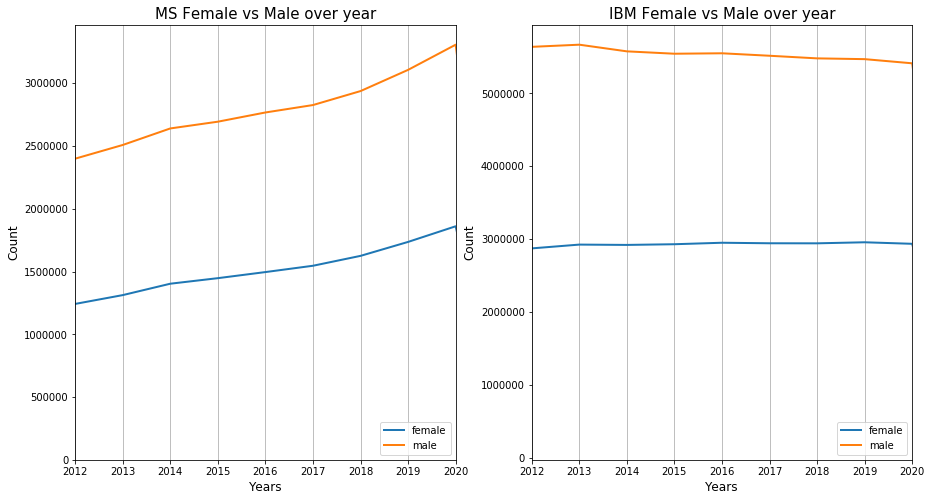

In [39]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15,8))
female_ms.plot(ax=ax[0], linewidth=2)
male_ms.plot(ax=ax[0],linewidth=2)
ax[0].set_title('MS Female vs Male over year', size=15)
ax[0].set_xlabel('Years', size=12)
ax[0].set_ylabel('Count', size=12)
ax[0].set_xlim(2012, 2020)
ax[0].legend(['female','male'], loc="lower right", ncol=1)
ax[0].xaxis.grid(True)

#IBM
female_ibm.plot(ax=ax[1], linewidth=2)
male_ibm.plot(ax=ax[1],linewidth=2)
ax[1].set_title('IBM Female vs Male over year', size=15)
ax[1].set_xlabel('Years', size=12)
ax[1].set_ylabel('Count', size=12)
ax[1].set_xlim(2012, 2020)
ax[1].legend(['female','male'], loc="lower right", ncol=1)
ax[1].xaxis.grid(True)

In [30]:
df_ms.columns

Index(['company', 'sector', 'month', 'job_category', 'region', 'gender',
       'count', 'inflow', 'outflow', 'year', 'month_in_year'],
      dtype='object')

# Q How inflow and outflow changes over time in 'MICROSOFT'

In [40]:
flow_ms = df_ms.groupby('year').agg({'inflow':'sum', 'outflow':'sum'})

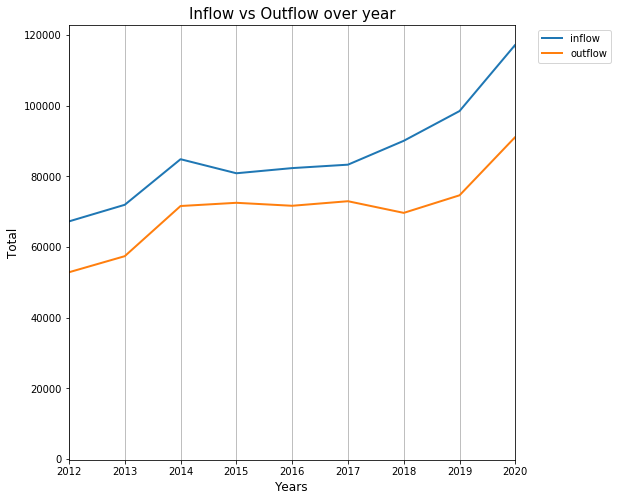

In [41]:
fig, ax = plt.subplots()
flow_ms.plot(ax=ax, figsize=(8,8), linewidth=2)
ax.set_title('Inflow vs Outflow over year', size=15)
ax.set_xlabel('Years', size=12)
ax.set_ylabel('Total', size=12)
ax.set_xlim(2012, 2020)
ax.legend(bbox_to_anchor=(1.04,1), ncol=1)
ax.xaxis.grid(True)

In [42]:
flow_ibm = df_ibm.groupby('year').agg({'inflow':'sum', 'outflow':'sum'})

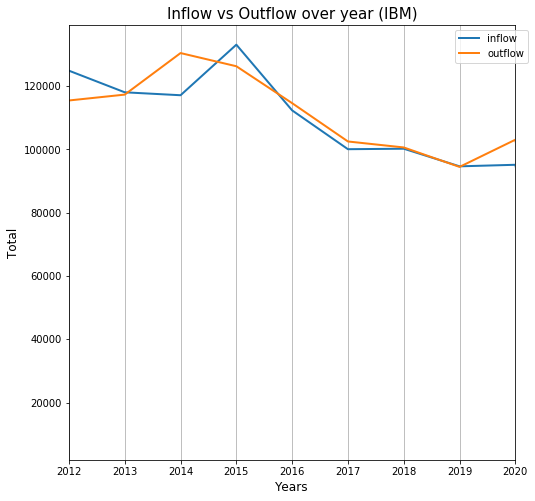

In [44]:
fig, ax = plt.subplots()
flow_ibm.plot(ax=ax, figsize=(8,8), linewidth=2)
ax.set_title('Inflow vs Outflow over year (IBM)', size=15)
ax.set_xlabel('Years', size=12)
ax.set_ylabel('Total', size=12)
ax.set_xlim(2012, 2020)
ax.legend(bbox_to_anchor=(1.04,1), ncol=1)
ax.xaxis.grid(True)